In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#print(url)

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
       
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | byron bay
Processing Record 2 of Set 13 | half moon bay
Processing Record 3 of Set 13 | arraial do cabo
Processing Record 4 of Set 13 | bluff
Processing Record 5 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 13 | verkhnevilyuysk
Processing Record 7 of Set 13 | albany
Processing Record 8 of Set 13 | saint-philippe
Processing Record 9 of Set 13 | faanui
Processing Record 10 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 13 | chuy
Processing Record 12 of Set 13 | yerbogachen
Processing Record 13 of Set 13 | luderitz
Processing Record 14 of Set 13 | punta arenas
Processing Record 15 of Set 13 | maldonado
Processing Record 16 of Set 13 | vaini
Processing Record 17 of Set 13 | jamestown
Processing Record 18 of Set 13 | rikitea
Processing Record 19 of Set 13 | mount gambier
Processing Record 20 of Set 13 | upernavik
Processing Reco

Processing Record 33 of Set 16 | prince rupert
Processing Record 34 of Set 16 | kodiak
Processing Record 35 of Set 16 | jibuti
Processing Record 36 of Set 16 | vardo
Processing Record 37 of Set 16 | clarence town
Processing Record 38 of Set 16 | puerto plata
Processing Record 39 of Set 16 | berbera
Processing Record 40 of Set 16 | apateu
Processing Record 41 of Set 16 | flinders
Processing Record 42 of Set 16 | bondoukou
Processing Record 43 of Set 16 | tautira
Processing Record 44 of Set 16 | rolim de moura
City not found. Skipping...
Processing Record 45 of Set 16 | talaya
Processing Record 46 of Set 16 | georgetown
Processing Record 47 of Set 16 | chihuahua
Processing Record 48 of Set 16 | eureka
Processing Record 49 of Set 16 | port-gentil
Processing Record 50 of Set 16 | iwanai
Processing Record 1 of Set 17 | bargal
City not found. Skipping...
Processing Record 2 of Set 17 | camacha
Processing Record 3 of Set 17 | grafton
Processing Record 4 of Set 17 | madison
Processing Record 5

Processing Record 21 of Set 20 | kungurtug
Processing Record 22 of Set 20 | lindi
Processing Record 23 of Set 20 | pahrump
Processing Record 24 of Set 20 | boguchany
Processing Record 25 of Set 20 | poyarkovo
Processing Record 26 of Set 20 | concarneau
Processing Record 27 of Set 20 | copiapo
Processing Record 28 of Set 20 | jhargram
Processing Record 29 of Set 20 | bongouanou
Processing Record 30 of Set 20 | nouadhibou
Processing Record 31 of Set 20 | formosa do rio preto
Processing Record 32 of Set 20 | ulagan
Processing Record 33 of Set 20 | oussouye
Processing Record 34 of Set 20 | burica
City not found. Skipping...
Processing Record 35 of Set 20 | porto novo
Processing Record 36 of Set 20 | ginda
Processing Record 37 of Set 20 | bom jesus dos perdoes
Processing Record 38 of Set 20 | zabinka
City not found. Skipping...
Processing Record 39 of Set 20 | tervel
Processing Record 40 of Set 20 | marsh harbour
Processing Record 41 of Set 20 | mergui
City not found. Skipping...
Processing

Processing Record 5 of Set 24 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 24 | xining
Processing Record 7 of Set 24 | doctor pedro p. pena
City not found. Skipping...
Processing Record 8 of Set 24 | tlalchapa
Processing Record 9 of Set 24 | bolungarvik
City not found. Skipping...
Processing Record 10 of Set 24 | marquette
Processing Record 11 of Set 24 | quebo
Processing Record 12 of Set 24 | meyungs
City not found. Skipping...
Processing Record 13 of Set 24 | hervey bay
Processing Record 14 of Set 24 | valle del guamuez
Processing Record 15 of Set 24 | cumbum
Processing Record 16 of Set 24 | vostok
Processing Record 17 of Set 24 | shache
Processing Record 18 of Set 24 | kopervik
Processing Record 19 of Set 24 | bitkine
Processing Record 20 of Set 24 | lazaro cardenas
Processing Record 21 of Set 24 | aleksandrovskiy zavod
Processing Record 22 of Set 24 | vierzon
Processing Record 23 of Set 24 | thinadhoo
Processing Record 24 of Set 24 | beringovskiy
Processing R

In [10]:
len(city_data)

550

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Byron Bay,-28.6500,153.6167,59.94,62,98,14.32,AU,2022-07-20 06:28:00
1,Half Moon Bay,37.4636,-122.4286,62.91,88,100,17.27,US,2022-07-20 06:29:58
2,Arraial Do Cabo,-22.9661,-42.0278,68.25,90,0,3.96,BR,2022-07-20 06:29:58
3,Bluff,-46.6000,168.3333,43.81,72,98,10.71,NZ,2022-07-20 06:29:59
4,Verkhnevilyuysk,63.4453,120.3167,68.72,62,100,7.25,RU,2022-07-20 06:29:59
5,Albany,42.6001,-73.9662,72.88,89,51,5.06,US,2022-07-20 06:27:03
6,Saint-Philippe,-21.3585,55.7679,75.22,68,49,18.10,RE,2022-07-20 06:30:00
7,Faanui,-16.4833,-151.7500,78.04,66,8,7.99,PF,2022-07-20 06:30:00
8,Chuy,-33.6971,-53.4616,44.11,91,0,5.50,UY,2022-07-20 06:30:01
9,Yerbogachen,61.2767,108.0108,65.34,79,100,9.73,RU,2022-07-20 06:30:02


In [12]:
# reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Byron Bay,AU,2022-07-20 06:28:00,-28.6500,153.6167,59.94,62,98,14.32
1,Half Moon Bay,US,2022-07-20 06:29:58,37.4636,-122.4286,62.91,88,100,17.27
2,Arraial Do Cabo,BR,2022-07-20 06:29:58,-22.9661,-42.0278,68.25,90,0,3.96
3,Bluff,NZ,2022-07-20 06:29:59,-46.6000,168.3333,43.81,72,98,10.71
4,Verkhnevilyuysk,RU,2022-07-20 06:29:59,63.4453,120.3167,68.72,62,100,7.25
5,Albany,US,2022-07-20 06:27:03,42.6001,-73.9662,72.88,89,51,5.06
6,Saint-Philippe,RE,2022-07-20 06:30:00,-21.3585,55.7679,75.22,68,49,18.10
7,Faanui,PF,2022-07-20 06:30:00,-16.4833,-151.7500,78.04,66,8,7.99
8,Chuy,UY,2022-07-20 06:30:01,-33.6971,-53.4616,44.11,91,0,5.50
9,Yerbogachen,RU,2022-07-20 06:30:02,61.2767,108.0108,65.34,79,100,9.73


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

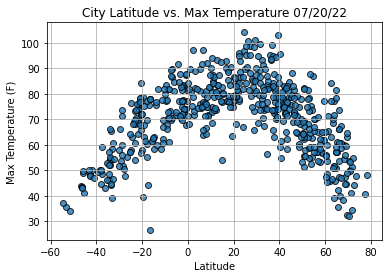

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

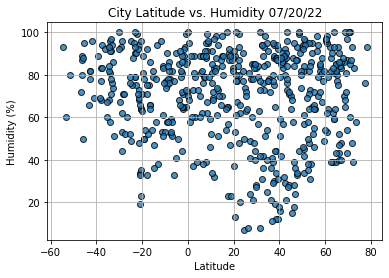

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

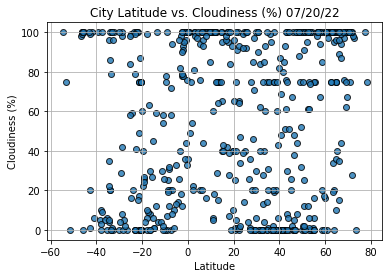

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

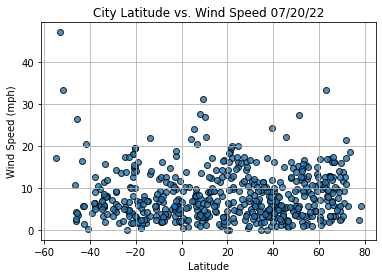

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# create Northern Hemisphere DataFrames 
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-07-20 06:30:03
Lat                         -21.2
Lng                        -175.2
Max Temp                    73.56
Humidity                       94
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [22]:
# filter a DataFrame based on a value of a row to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0,
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
545     True
546    False
547     True
548    False
549     True
Name: Lat, Length: 550, dtype: bool

In [25]:
# Return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Half Moon Bay,US,2022-07-20 06:29:58,37.4636,-122.4286,62.91,88,100,17.27
4,Verkhnevilyuysk,RU,2022-07-20 06:29:59,63.4453,120.3167,68.72,62,100,7.25
5,Albany,US,2022-07-20 06:27:03,42.6001,-73.9662,72.88,89,51,5.06
9,Yerbogachen,RU,2022-07-20 06:30:02,61.2767,108.0108,65.34,79,100,9.73
14,Jamestown,US,2022-07-20 06:30:04,42.0970,-79.2353,74.79,87,0,5.75


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

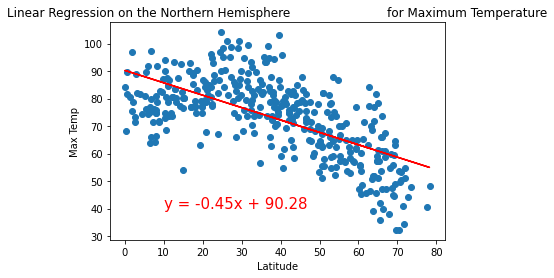

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

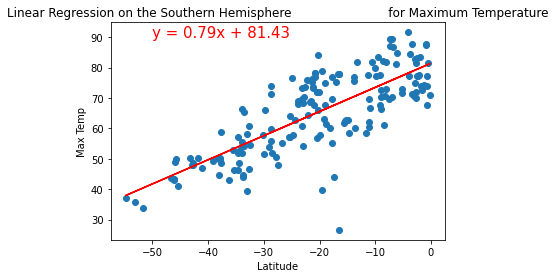

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

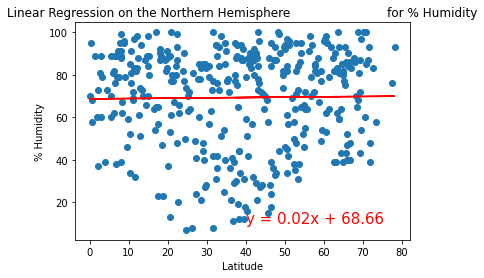

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

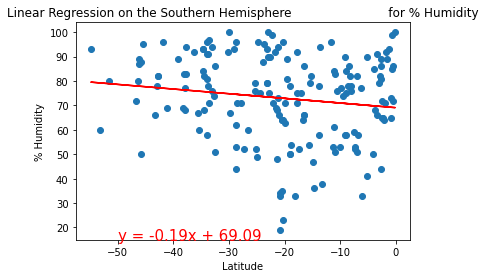

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

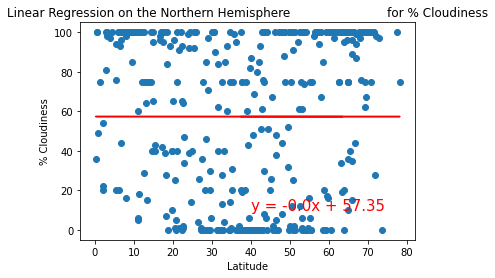

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

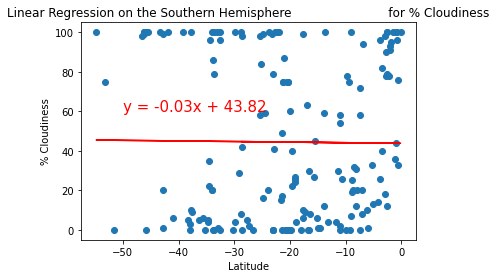

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

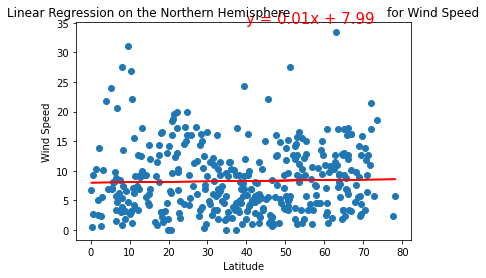

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


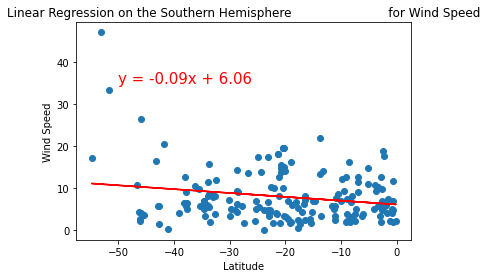

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))